# Jeu de dés

Dans ce notebook, nous reprenons l'exemple vu en cours d'un jeu de $ndes$ dés dont on contraint la somme totale sur les faces. En cours nous avions pris 3 dés et contraint la somme à être égale à 8 ce qui amenait à 21 cas possibles, parmi lesquels 6 ont la face "1" pour le dé 1, 5 ont la face "2" pour le dé 1 etc. On aboutit alors à une probabilité de trouver la face $i$ pour le dé 1 qui décroit en fonction de $i$. Cette décroissance est linéaire dans ce cas. Le but de ce notebook est de montrer que si on augmente le nombre de dés, on aboutit à une décroissance exponentielle, comme pour la loi de Boltzmann. Les dés qui ne sont pas le dé observé jouent le rôle de thermostat. La loi exponentielle est obtenu pour un thermostat grand devant le système observé. C'est ce que nous allons retrouver. Si le thermostat ne contient que 2 dés, la loi obtenue est différente.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
import tools.des as ds

## Tirages d'un jeu aléatoire de configurations des dés avec somme fixe

Ici, on fixe le nombre de dés, $ndes$, la contrainte sur la somme, $somme$ et le nombre de tirages, $ntirages$. 

Il est aussi possible de choisir des dés autres qu'à six faces en donnant le nombre de faces de chaque dé, $nfaces$.

In [30]:
ndes=3
somme=8
nfaces=6
ntirages=10000

La fonction $ds.TiragesDes$ génère alors $ntirages$ configurations des dés avec la contrainte sur la somme des faces et avec une distribution équiprobable sur toutes les configurations compatibles avec cette contrainte.

$somme$ doit vérifier $ndes \le somme \le nfaces\times ndes$, sinon $ds.TiragesDes$ renvoie un message d'erreur.

Le paramètre $npas$ sert à la génération des tirages, la fonction génère en réalité $npas \times ntirages$ configurations à la suite et en extrait une configuration tous les $npas$. Ceci sert à avoir des configurations avec plus de différences entre elles.

In [31]:
tirages=ds.TiragesDes(ndes=ndes,somme=somme,nfaces=nfaces,ntirages=ntirages,npas=100)

On peut faire un histogramme des configurations générées. Chaque barre est indéxée par "i-j-k" où $i$, $j$ et $k$ sont les faces des dés 1, 2 et 3 respectivement. 

On peut tracer cette histogramme avec 4, voire 5 dés. Cependant, si le nombre de configurations possibles est plus grand que 50, alors un message d'erreur est affiché.

Vous pouvez observer que chacune des configurations, états microscopiques, du système total, qui est un système isolé, sont équiprobables (aux erreurs statistiques près qui disparaissent pour un grand nombre de tirages).

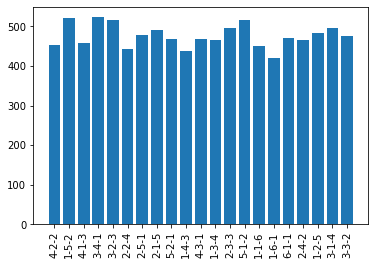

In [32]:
hist=ds.HistogrammeDes(tirages)

if (len(hist) < 50):
    plt.bar(hist.keys(),hist.values())
    plt.xticks(rotation='vertical')
    plt.show()
else:
    print("Trop de valeurs pour tracer l'histogramme")

## Calcul des probabilités de chaque face pour un dé donné

Nous allons maintnant nous intéresser à un seul dé parmi les $ndes$ dés. La fonction $Proba(tirages,ides,nfaces)$ extrait des tirages précédents les probabilités que le dé $ides$ expose chacune des faces parmi les $nfaces$.

Avec 3 dés, on retrouve l'exemple du cours avec une probabilité qui décroit linéairement. Avec un plus grand nombre de dés, on obtient une décroissance plus rapide.

In [33]:
ds.Proba(tirages,ides=1,nfaces=nfaces)

array([0.2882, 0.2365, 0.1906, 0.1426, 0.1001, 0.042 ])

La cellule ci-dessus trace cette probabilité pour chaque dé, jusqu'à dix dés. En plus de pouvoir discuter la décroissance de cette probabilité, on peut se rendre compte que chaque dé est équivalent, comme on peut s'y attendre.

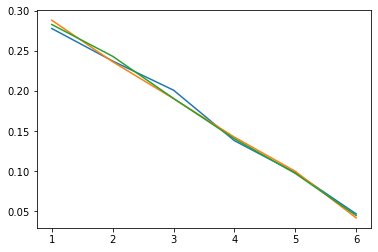

In [34]:
x=np.arange(nfaces)+1

for ides in range(min(10,ndes)):
    plt.plot(x,ds.Proba(tirages,ides,nfaces=nfaces))

plt.show()

Nous allons maintenant comparer la loi de probabilité de chaque face observée avec la loi de Bolzmann.

La loi de Bolzmann dans le cas présent s'écrit

$$ P(x)=\frac{\exp \left(-\frac{x}{n_0}\right)}{q},$$

où $n_0$ est un paramètre jouant le rôle de la température, $k_BT$. $q$ est la fonction de partition.

Ici, nous ne fixons pas la température du thermostat, mais "l'énergie totale", c'est à dire le paramètre $somme$. Comme chaque dé est équivalent, voir ci-dessus, "l'énergie interne" de chaque dé, la valeur moyenne de la face, st égale à $somme/ndes$. $n_0$ est alors obtenu par la fonction $BoltzmannParam$ de façon à ce que la loi de Boltzmann ait la même valeur moyenne.

La fonction de partition est alors obtenu grâce à la formule qui la définit:
$$q=\sum_{x=1}^{n_{\mathrm{faces}}} \exp \left(-\frac{x}{n_0}\right)$$.

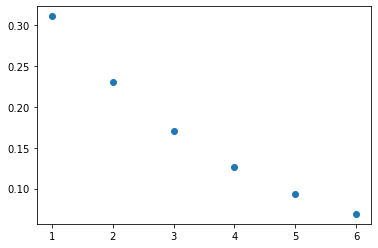

In [35]:
n0,q=ds.BoltzmannParam(somme/ndes,nfaces=nfaces)

ProbaBoltzmann=1/q*np.exp(-x/n0)

plt.plot(x,ProbaBoltzmann,'o')
plt.show()

Nous pouvons maintenant comparer la loi observée et la loi de Boltzmann.

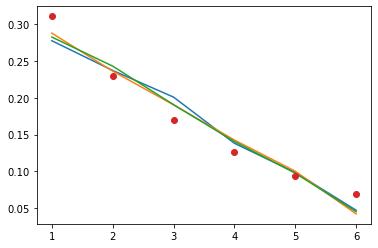

In [36]:
x=np.arange(nfaces)+1

for ides in range(min(10,ndes)):
    plt.plot(x,ds.Proba(tirages,ides,nfaces=nfaces))

n0,q=ds.BoltzmannParam(somme/ndes,nfaces=nfaces)

ProbaBoltzmann=1/q*np.exp(-x/n0)

plt.plot(x,ProbaBoltzmann,'o')

plt.show()

### A faire

Commencez avec $ndes=3$ et $somme=8$ comme en cours. Puis augmenter $ndes$ progressivement. Augmentez simultanément $somme$, qui est une grandeur extensive. Pour $ndes$ entre 10 et 100, prenez $somme$ entre 2 et 3 fois $ndes$.

Vous pouvez aussi jouer avec le paramêtre $nfaces$.